In [ ]:
# STEP 4: TEST DATA QUALITY
# Explore Result Quality Part II.
# The results from before will be analyzed more structuredly
# This notebook looks at the distribution of the score value in our dataset

In [1]:
# >>> Preparation
# Import categorized 'names_cat.csv'
import pandas

print("Importing names... ")
names = pandas.read_csv("data/names_cat_i1.csv", usecols=["name", "n_publs", "likely_gender", "score"])

# Setting index & accessing cells: https://pythonhow.com/accessing-dataframe-columns-rows-and-cells/
names = names.set_index("name", drop = False)
print("Names imported. They look like this: {}".format(names[:5]))

Importing names... 
Names imported. They look like this:                                         name likely_gender  n_publs  score
name                                                                      
'Maseka Lesaoana            'Maseka Lesaoana        female        2      8
(David) Jing Dai            (David) Jing Dai          male        1      7
(Max) Zong-Ming Cheng  (Max) Zong-Ming Cheng          male        2      2
(Sophy) Shu-Jiun Chen  (Sophy) Shu-Jiun Chen        female        2      7
(Zhou) Bryan Bai            (Zhou) Bryan Bai          male        2      6


In [2]:
f = names[names['likely_gender'] == 'female']
m = names[names['likely_gender'] == 'male']

In [3]:
# >>> Visualization
# preparations
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['pgf.rcfonts'] = False
mpl.rcParams['font.size'] = 11.0

# Get bin sizes for histograms
bins_f = f['score'].max()
bins_f = int(round(bins_f))

bins_m = m['score'].max()
bins_m = int(round(bins_m))

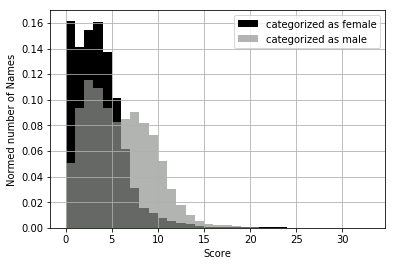

In [4]:
names[names["likely_gender"]=="female"]["score"].hist(density=True, color="xkcd:black", label="categorized as female", bins=bins_f)
names[names["likely_gender"]=="male"]["score"].hist(alpha=0.7, density=True, color="xkcd:grey", label="categorized as male", bins=bins_m)

plt.xlabel("Score")
plt.ylabel("Normed number of Names")
plt.legend()

plt.savefig('graphs/score/before_improving_by_gender.pdf')
plt.savefig('graphs/score/before_improving_by_gender.pgf')

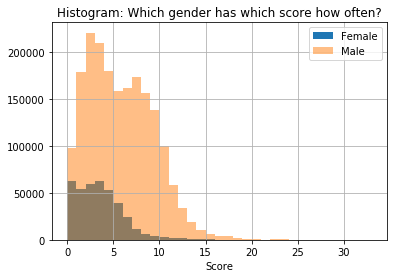

In [6]:
f['score'].hist(label="Female", bins=bins_f)
m['score'].hist(alpha=0.5, label="Male", bins=bins_m)

plt.xlabel("Score")
plt.title("Histogram: Which gender has which score how often?")
plt.legend()

In [ ]:
names[names["score"] > 4].describe()#1.127184e+06 / 2.306418e+06

In [ ]:
# >>> Evaluation:
# 1. The score value is not distributed equally for men and women.
# 2. Women's scores are lower than men's scores. 
# We see more female classifications than male classifications if looking at data with a score between 0 and 6., 
# 3. The threshold we chose will influence our results. 

# 4. We learn about the NamSor API:
# meaning the API is more certain when classifying a name as male, 
# than it is when classifying a name as female.

# >>> Consequence:
# We shall look into this further by investigating how the threshold we chose influences our results.